# How well do these people meet the recommendation of at least 30 minutes of moderate activity per day on weekdays?

### Import Data

In [18]:
# Importing packages

# Using Pandas library to read csv files
import pandas as pd
# Using Wanings library to disable messages
import warnings

import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Importing dataset
# minuteSteps = pd.read_csv("/content/minuteStepsWide_merged.csv")
# hourlySteps = pd.read_csv("/content/hourlySteps_merged.csv")
# dailySteps = pd.read_csv("/content/dailySteps_merged.csv")

minuteSteps = pd.read_csv("minuteStepsWide_merged.csv")
hourlySteps = pd.read_csv("hourlySteps_merged.csv")
dailySteps = pd.read_csv("dailySteps_merged.csv")

In [4]:
# merging two dataset
wrkData = pd.merge(minuteSteps, hourlySteps, how = 'inner', on =['Id', 'ActivityHour'])
wrkData

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59,StepTotal
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,9,8,0,20,1,0,0,0,0,144
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21302,8877689391,5/12/2016 10:00:00 AM,107,96,86,55,13,0,0,20,...,0,0,0,0,0,0,0,21,20,514
21303,8877689391,5/12/2016 11:00:00 AM,32,0,8,0,39,63,92,34,...,0,0,0,0,16,97,31,31,79,1407
21304,8877689391,5/12/2016 12:00:00 PM,29,31,0,33,85,12,43,9,...,90,38,41,84,21,0,0,0,0,3135
21305,8877689391,5/12/2016 1:00:00 PM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,307


In [26]:
ids = wrkData['Id'].unique().tolist()

In [5]:
# The dimension of dataset
wrkData.shape

(21307, 63)

### Data Cleaning

1. Handling datetime attribute: convert the activity hour data in the dataset into standard date data and generate a separate column of these date data

In [6]:
# Extracting the date from 'ActivityHour' and store into new column
wrkData['Date'] = pd.to_datetime(wrkData['ActivityHour'])
# Extract only the date part, but keep it as datetime dtype
wrkData['Date'] = wrkData['Date'].dt.normalize()

2. Filter the dataset into weekday only
    * this is because of our driving problem, we will focus on weekday dataset

In [7]:
wrkData = wrkData[wrkData['Date'].dt.weekday < 5]
# Disabled warning messages
warnings.filterwarnings('ignore')
wrkData.shape

(15496, 64)

After the filtering and adding 'Date', the merged dataset contains 15496 rows and 64 columns

In [8]:
# Checking existence of workday
dates = wrkData['Date'].unique()
for date in dates:
    print(date)

2016-04-13T00:00:00.000000000
2016-04-14T00:00:00.000000000
2016-04-15T00:00:00.000000000
2016-04-18T00:00:00.000000000
2016-04-19T00:00:00.000000000
2016-04-20T00:00:00.000000000
2016-04-21T00:00:00.000000000
2016-04-22T00:00:00.000000000
2016-04-25T00:00:00.000000000
2016-04-26T00:00:00.000000000
2016-04-27T00:00:00.000000000
2016-04-28T00:00:00.000000000
2016-04-29T00:00:00.000000000
2016-05-02T00:00:00.000000000
2016-05-03T00:00:00.000000000
2016-05-04T00:00:00.000000000
2016-05-05T00:00:00.000000000
2016-05-06T00:00:00.000000000
2016-05-09T00:00:00.000000000
2016-05-10T00:00:00.000000000
2016-05-11T00:00:00.000000000
2016-05-12T00:00:00.000000000


Above code verifies that we have successfully isolated the step count data pertaining to weekdays.

### Analysis of Adherence Data

## Data Analysis

Based on our driving problem, we must assess two criteria to determine if the participant has satisfy them:

1. The participant should engage in activity for a minimum of 30 minutes daily.
2. A moderate activity level is defined by a daily step count ranging from 7,500 to 10,000 steps.

Therefore, we aim to determine the rate at which participants meet these specified criteria.

A function has been developed to modularize the code, enabling us to perform analysis on any participant within the dataset.
This function takes the following parameters:
1. Id: The unique identifier for each participant.
2. wrkData: A merged dataset combining minuteSteps and hourlySteps data.

Upon execution, this function yields a list with:
* 'true_percentage': The proportion of times the participant meets the set criteria.
* 'false_percentage': The proportion of times the participant does not meet the criteria.

In [9]:
def create_new_df(Id, wrkData):
    participant = wrkData[wrkData["Id"] == Id]
    # total minutes of a day
    total = 60*24
    # Calculating the number of zeros that appeared in a row
    participant['ZeroCount'] = participant.apply(lambda row: (row == 0).sum(), axis=1)
    # Check if 'ZeroCount' exceeds 60 and set it to 60 if it does
    participant.loc[participant['ZeroCount'] > 60, 'ZeroCount'] = 60
    # Calculate the number of non-zero minutes per day
    df = participant.groupby('Date')['ZeroCount'].sum().reset_index()

    df['ExerciseMins'] = total - df['ZeroCount']

    # calculate the total number of steps daily
    df['StepTotal'] = participant.groupby('Date')['StepTotal'].sum().reset_index()['StepTotal']
    # Calculate the average steps per minute
    # round to 2dp because it is a standard convention
    df['AvgStepMins'] = round(df['StepTotal'] / df['ExerciseMins'], 2)

    df['satisfy'] = (df['ExerciseMins'] > 30) & (df['StepTotal'] > 7500)

    return df


In [10]:
df = create_new_df(1624580081,wrkData)
df.info()

In [12]:
def calculate_satisfy_rate(df):
    # calculate the percentage of participant satisfy both requirements
    true_percentage = round((df['satisfy'].sum() / len(df)) * 100, 2)
    false_percentage = round(100 - true_percentage, 2)

    result = [true_percentage, false_percentage]

    return result

In [13]:
calculate_satisfy_rate(df)

[13.64, 86.36]

In [33]:
def plotPic(Id,wrkData):

    df = create_new_df(Id, wrkData)
    df.fillna(0, inplace=True)
    # Set style
    plt.style.use('seaborn-white')

    # Filter data for 'satisfy' column to set bar colors
    colors = ['lightgreen' if satisfy else 'salmon' for satisfy in df['satisfy']]

    # Create the bar chart for StepTotal
    fig, ax1 = plt.subplots()
    ax1.bar(df['Date'], df['StepTotal'], color=colors, label='StepTotal')
    ax1.set_ylabel('StepTotal')

    # Create the line chart for AvgStepMins and ExerciseMins
    ax2 = ax1.twinx()
    ax2.plot(df['Date'], df['AvgStepMins'], color='skyblue', label='AvgStepMins', marker='o')
    ax2.plot(df['Date'], df['ExerciseMins'], color='pink', label='ExerciseMins', marker='o')
    ax2.set_ylabel('AvgStepMins and ExerciseMins')

    # Customize the plot
    plt.xlabel('Date')
    plt.title(str(Id)+' StepTotal, AvgStepMins, and ExerciseMins in Weekday')
    plt.xticks(rotation=45, ha='right')
    ax1.xaxis.set_major_formatter(plt.FixedFormatter(df['Date'].dt.strftime('%m-%d')))
    plt.legend()

    # Set reasonable y-limits for the line charts
    ax2.set_ylim(0, max(max(df['AvgStepMins']), max(df['ExerciseMins'])) + 10)

    # Remove grid lines
    plt.grid(False)

    # Show the plot
    plt.show()

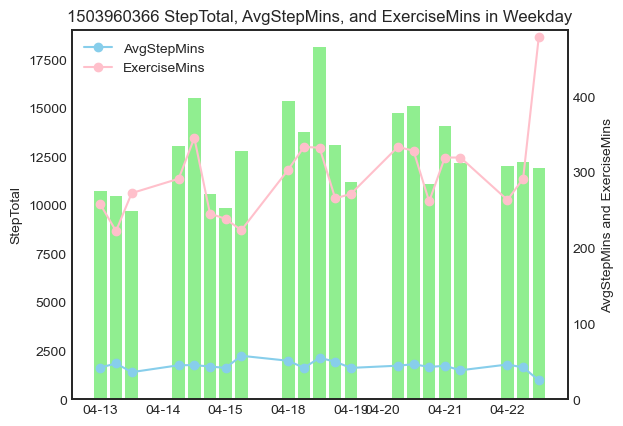

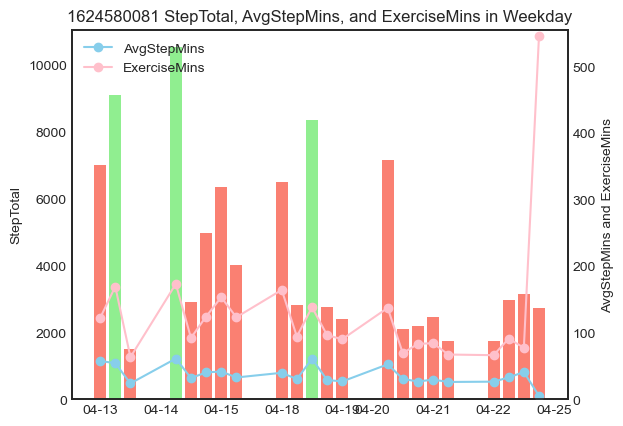

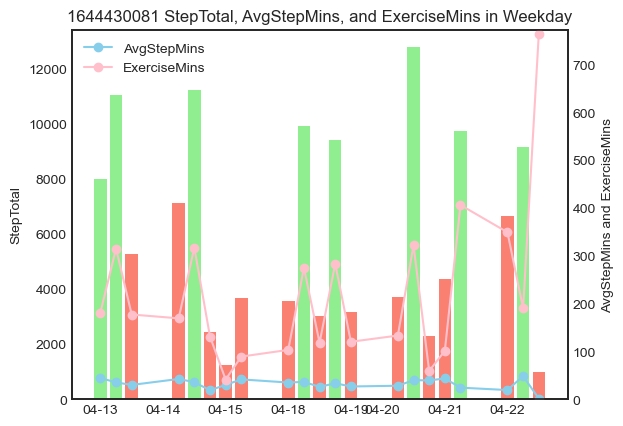

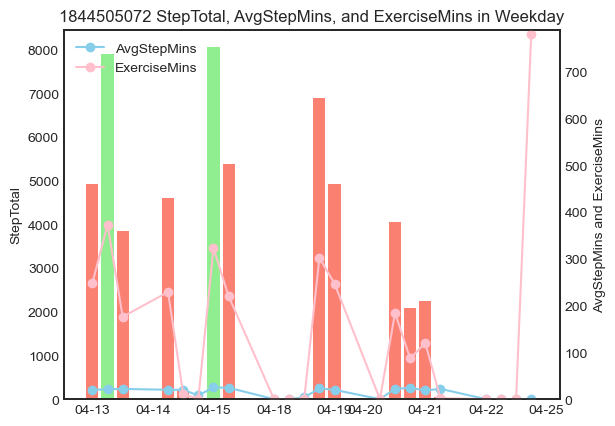

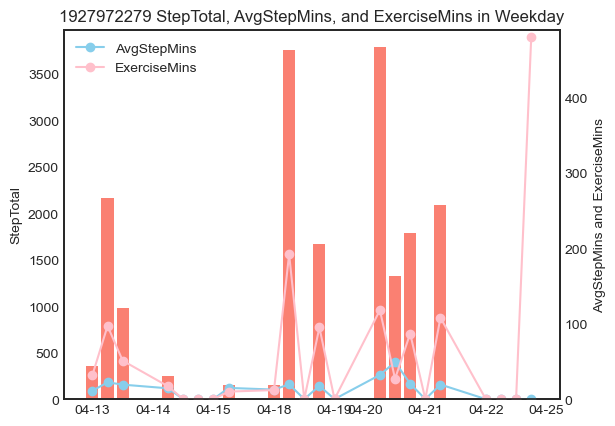

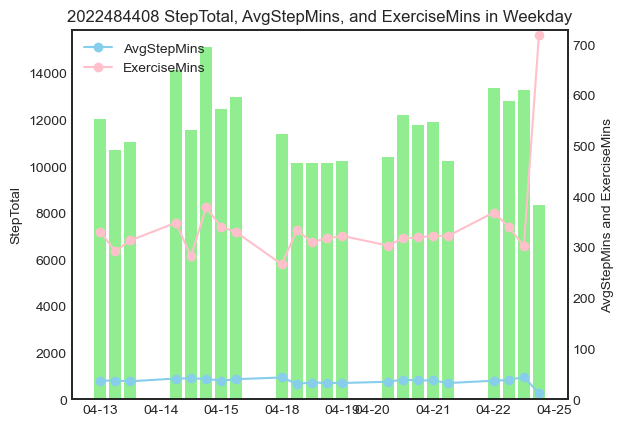

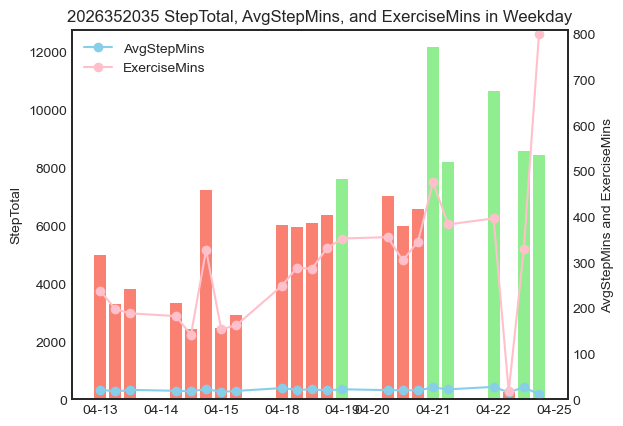

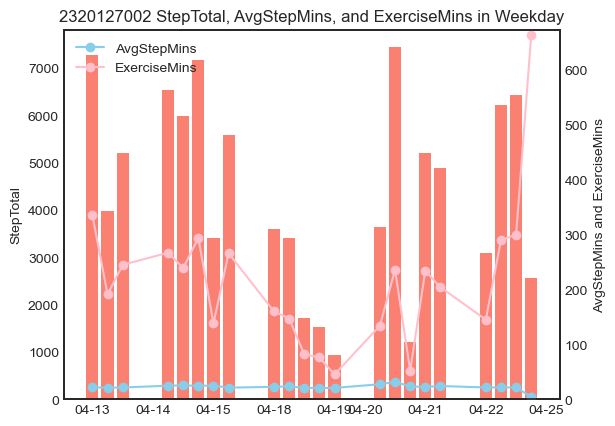

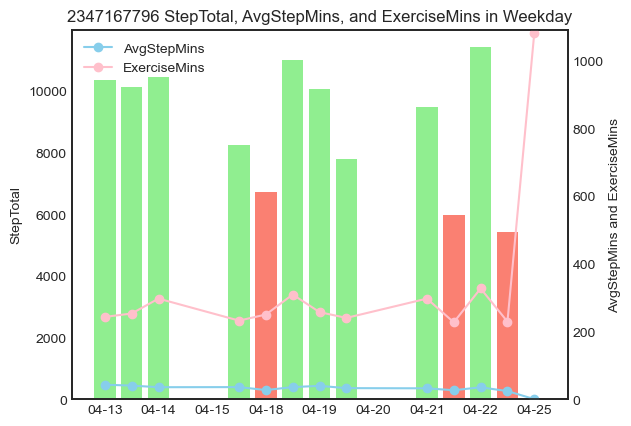

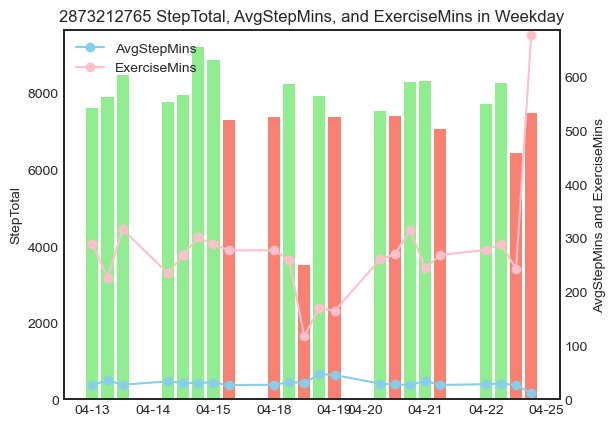

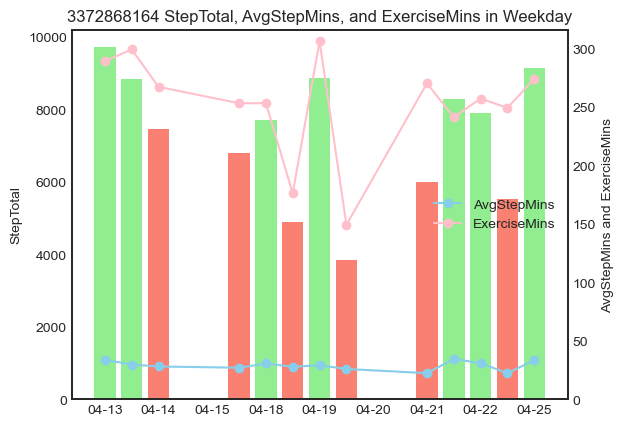

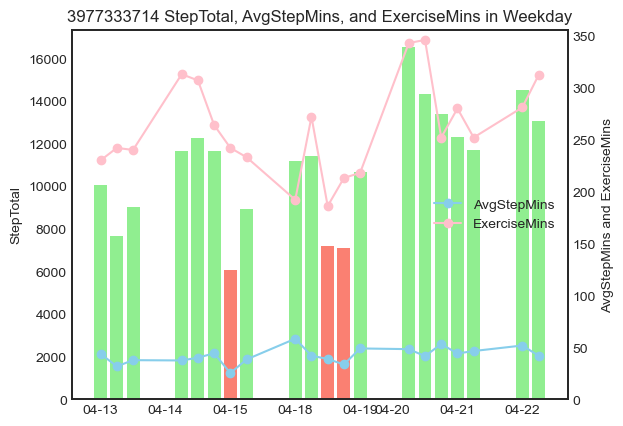

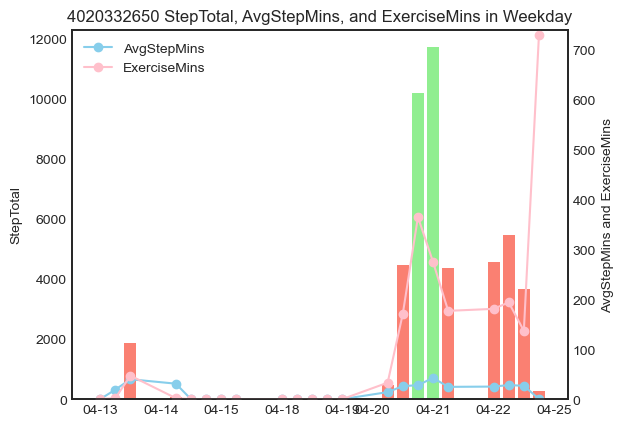

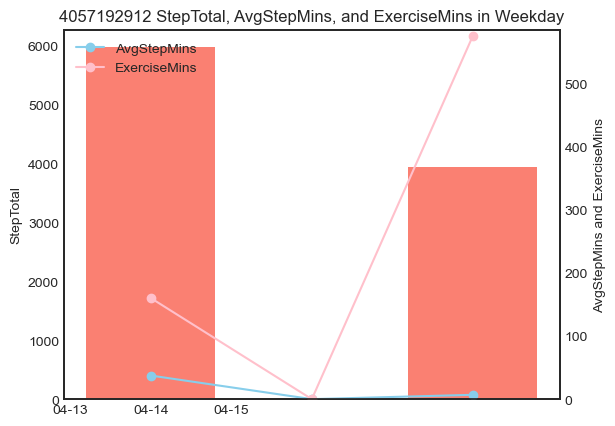

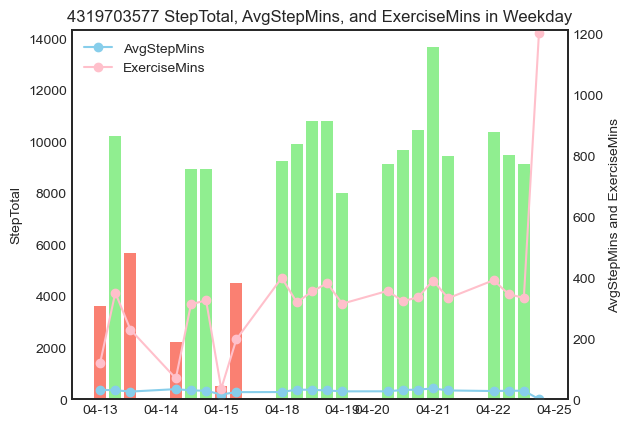

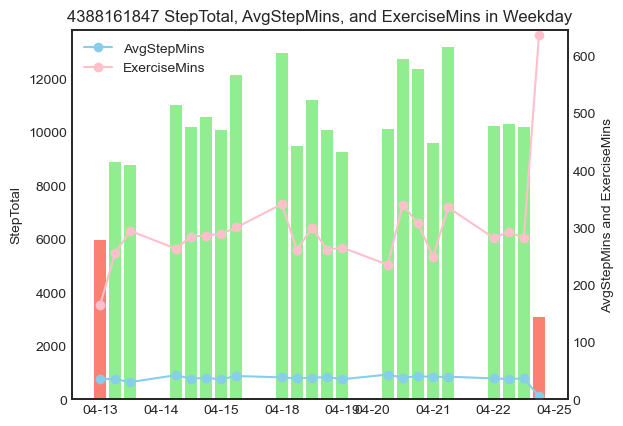

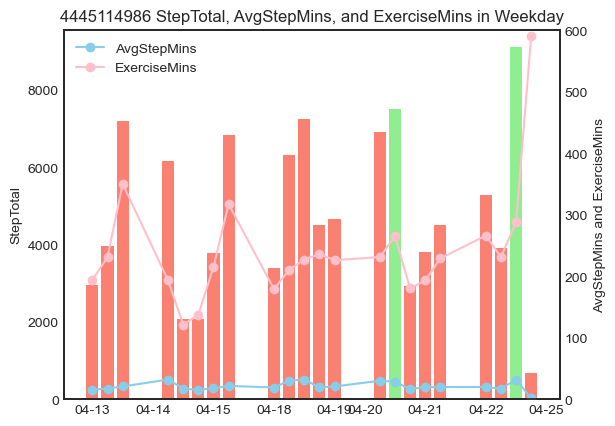

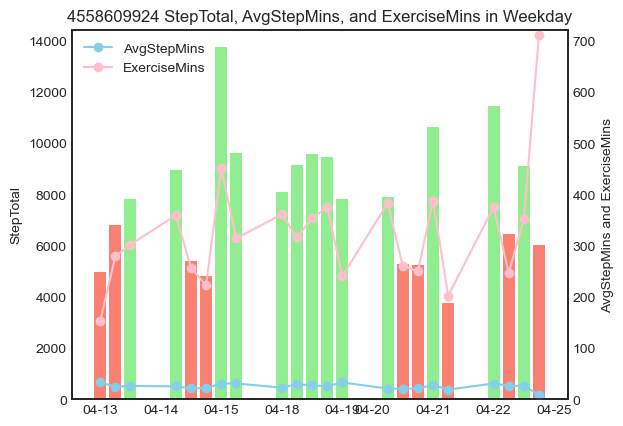

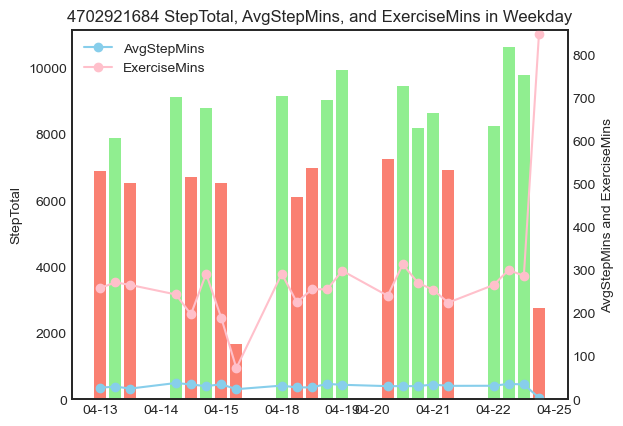

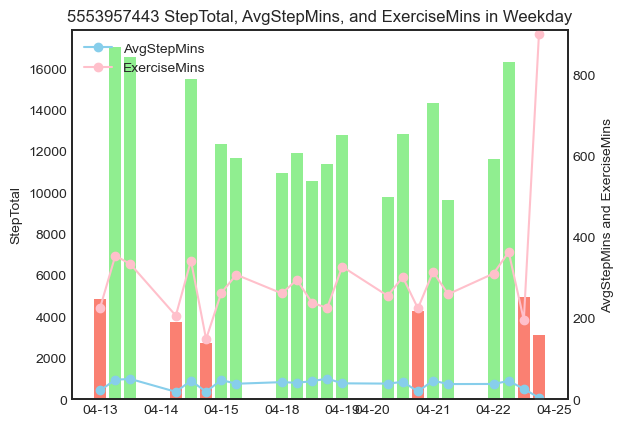

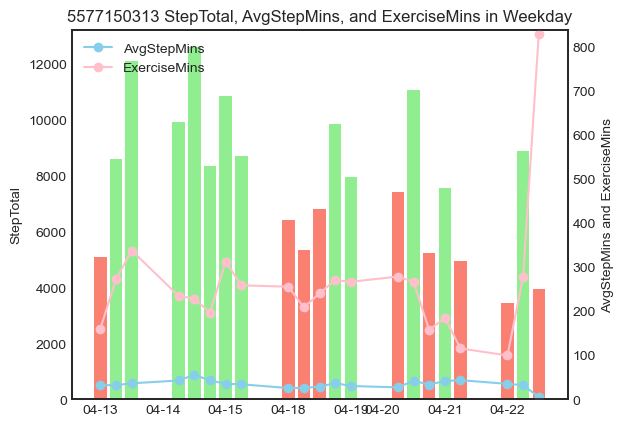

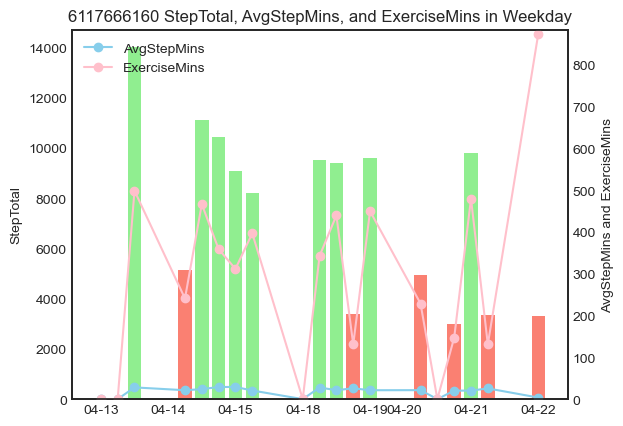

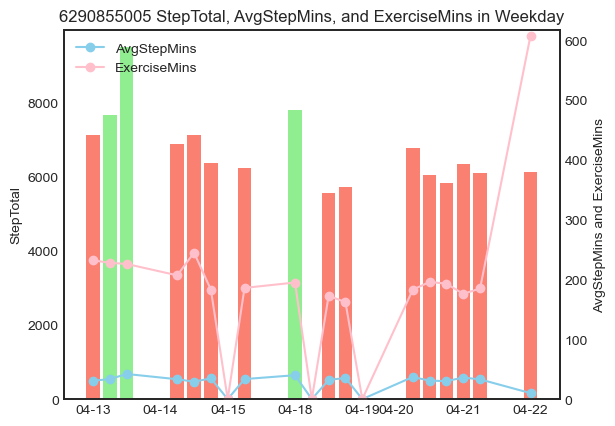

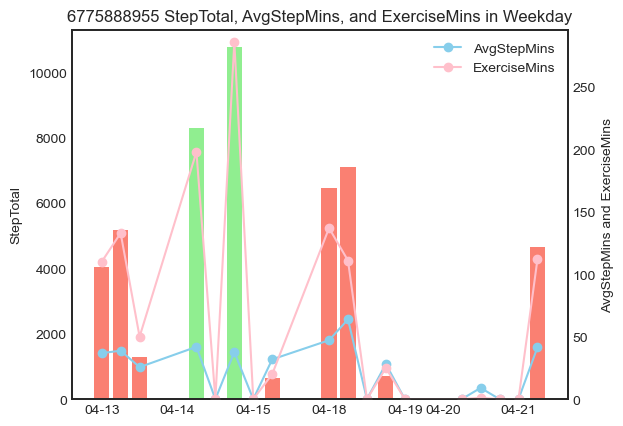

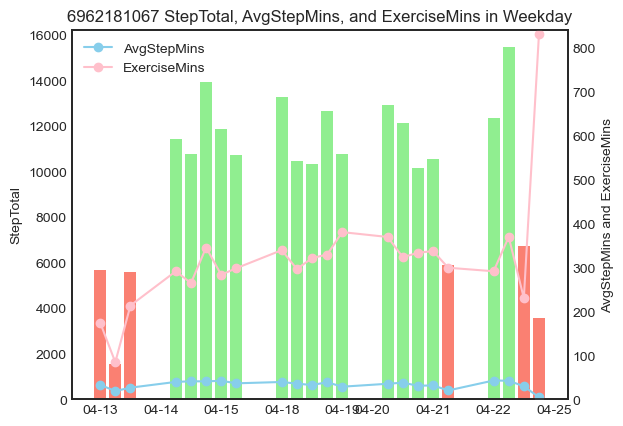

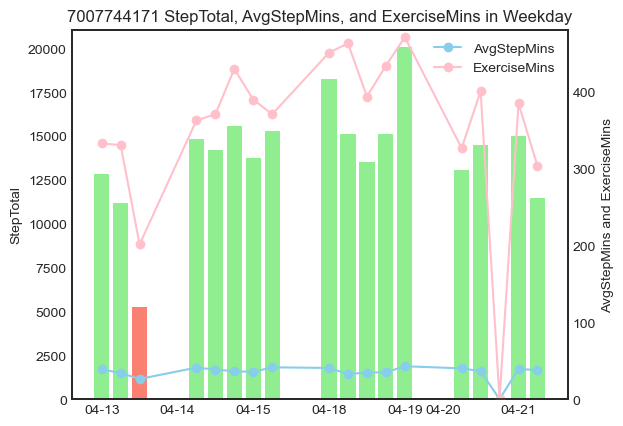

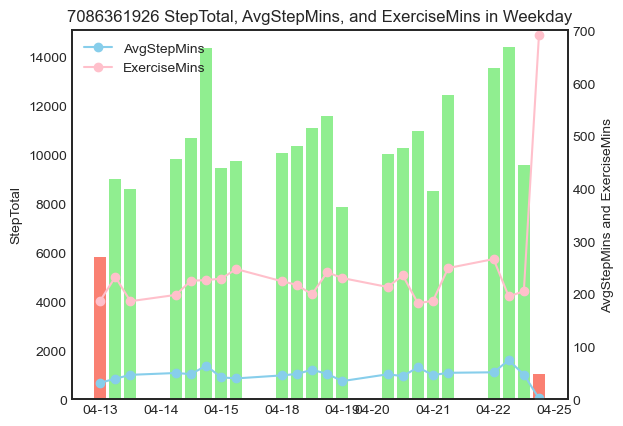

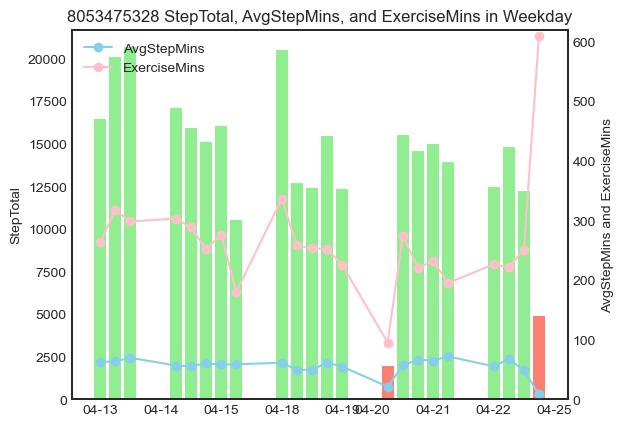

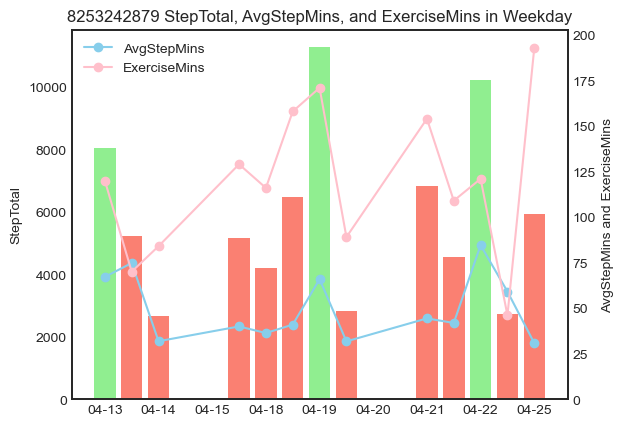

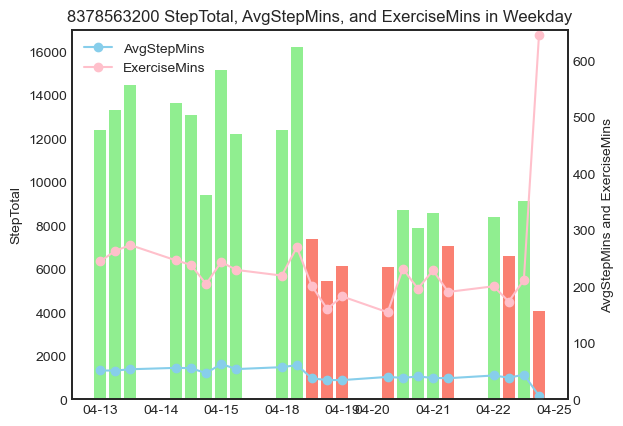

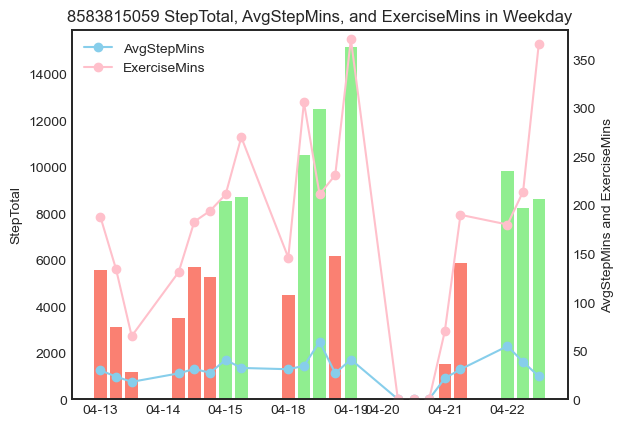

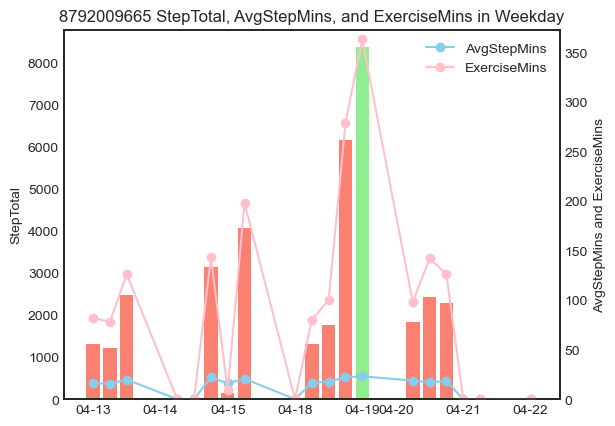

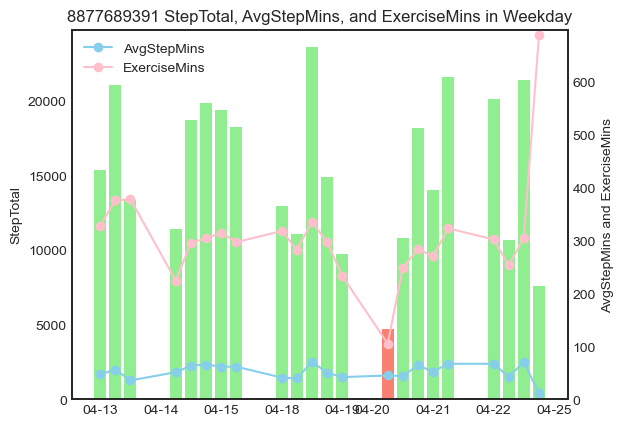

In [34]:
for i in ids:
    plotPic(i,wrkData)